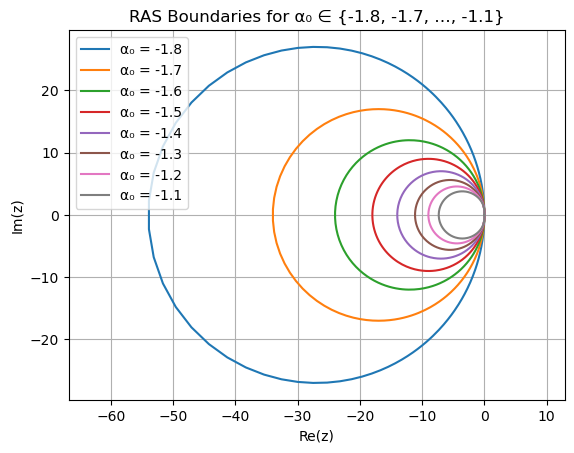

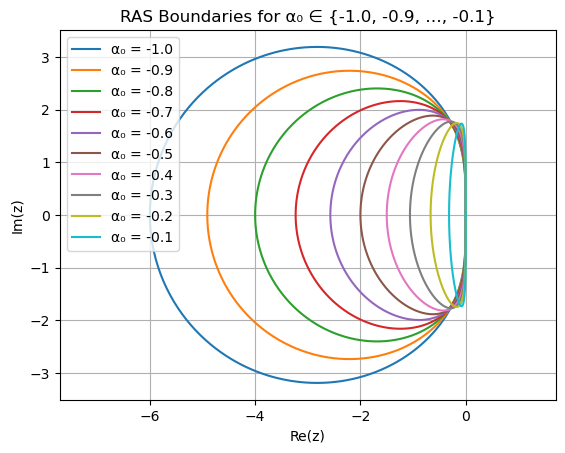

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ras_boundary(alpha0, theta):
    alpha1 = -1 - alpha0
    beta_minus1 = (4 - alpha0) / 12
    beta_0 = (4 + 2 * alpha0) / 3
    beta_1 = (4 + 5 * alpha0) / 12
    numerator = np.exp(2j * theta) + alpha0 * np.exp(1j * theta) + alpha1
    denominator = beta_minus1 * np.exp(2j * theta) + beta_0 * np.exp(1j * theta) + beta_1
    z = numerator / denominator
    return z

theta = np.linspace(0, 2 * np.pi, 1000)

alphas_group1 = np.arange(-1.8, -1.0, 0.1)
plt.figure()
for a in alphas_group1:
    z = ras_boundary(a, theta)
    plt.plot(z.real, z.imag, label=f'α₀ = {a:.1f}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('RAS Boundaries for α₀ ∈ {-1.8, -1.7, …, -1.1}')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

alphas_group2 = np.arange(-1.0, 0.0, 0.1)
plt.figure()
for a in alphas_group2:
    z = ras_boundary(a, theta)
    plt.plot(z.real, z.imag, label=f'α₀ = {a:.1f}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('RAS Boundaries for α₀ ∈ {-1.0, -0.9, …, -0.1}')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


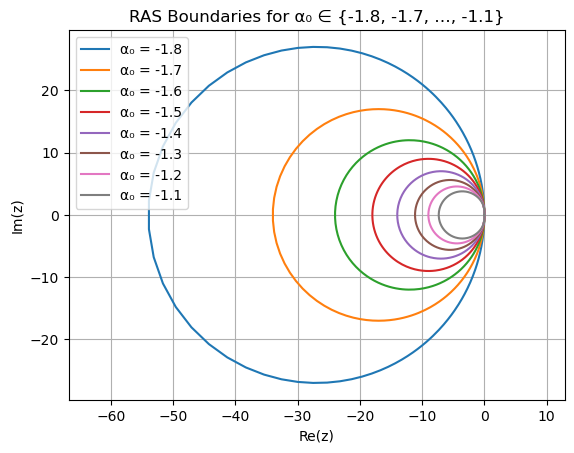

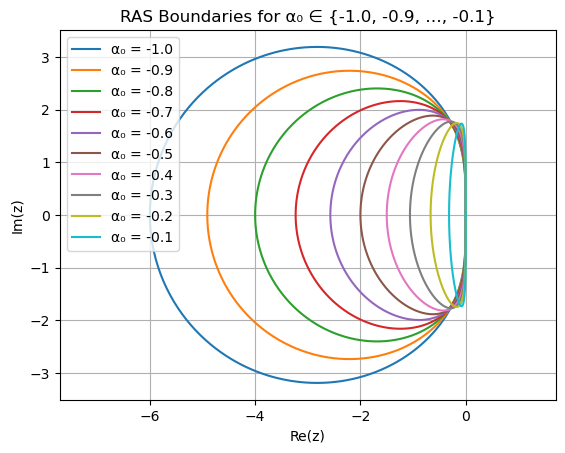

Results for Group 1 (α₀ from -1.8 to -1.1):
For alpha0 = -1.80, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.70, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.60, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.50, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.40, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.30, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.20, the test point is stable, so the RAS is inside the contour.
For alpha0 = -1.10, the test point is stable, so the RAS is inside the contour.

Results for Group 2 (α₀ from -1.0 to -0.1):
For alpha0 = -1.00, the test point is stable, so the RAS is inside the contour.
For alpha0 = -0.90, the test point is stable, so the RAS is inside the contour.
For alpha0 = -0.80, the test point is stable, so the RAS is inside the contour.
For alpha0 = -0.70, the test po

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def coefficients(alpha0):
    alpha1 = -1 - alpha0
    beta_minus1 = (4 - alpha0) / 12
    beta_0 = (4 + 2 * alpha0) / 3
    beta_1 = (4 + 5 * alpha0) / 12
    return alpha1, beta_minus1, beta_0, beta_1

def ras_boundary(alpha0, theta):
    alpha1, beta_minus1, beta_0, beta_1 = coefficients(alpha0)
    numerator = np.exp(2j * theta) + alpha0 * np.exp(1j * theta) + alpha1
    denominator = beta_minus1 * np.exp(2j * theta) + beta_0 * np.exp(1j * theta) + beta_1
    return numerator / denominator

def polynomial_roots(alpha0, z):
    alpha1, beta_minus1, beta_0, beta_1 = coefficients(alpha0)
    c2 = 1 - z * beta_minus1
    c1 = alpha0 - z * beta_0
    c0 = (-1 - alpha0) - z * beta_1
    return np.roots([c2, c1, c0])

def check_stability_at_point(alpha0, z_test):
    roots = polynomial_roots(alpha0, z_test)
    tol = 1e-3
    if np.abs(roots[0] - 1) < tol:
        nontrivial = roots[1]
    elif np.abs(roots[1] - 1) < tol:
        nontrivial = roots[0]
    else:
        nontrivial = roots[np.argmax(np.abs(roots - 1))]
    return np.abs(nontrivial) < 1

theta = np.linspace(0, 2 * np.pi, 1000)

def test_ras(alpha_values):
    for a in alpha_values:
        z_boundary = ras_boundary(a, theta)
        z_centroid = np.mean(z_boundary)
        stable = check_stability_at_point(a, z_centroid)
        if stable:
            location = "inside"
        else:
            location = "outside"
        print(f"For alpha0 = {a:.2f}, the test point is {'stable' if stable else 'unstable'}, so the RAS is {location} the contour.")

alphas_group1 = np.arange(-1.8, -1.0, 0.1)
plt.figure()
for a in alphas_group1:
    z = ras_boundary(a, theta)
    plt.plot(z.real, z.imag, label=f'α₀ = {a:.1f}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('RAS Boundaries for α₀ ∈ {-1.8, -1.7, …, -1.1}')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

alphas_group2 = np.arange(-1.0, 0.0, 0.1)
plt.figure()
for a in alphas_group2:
    z = ras_boundary(a, theta)
    plt.plot(z.real, z.imag, label=f'α₀ = {a:.1f}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('RAS Boundaries for α₀ ∈ {-1.0, -0.9, …, -0.1}')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print("Results for Group 1 (α₀ from -1.8 to -1.1):")
test_ras(alphas_group1)

print("\nResults for Group 2 (α₀ from -1.0 to -0.1):")
test_ras(alphas_group2)
